<center><h2> Sentiment Analysis and Topic Modeling on Youtube Comments</h2></center>

### Import Required Libraries

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import re
import nltk
from cleantext import clean
import spacy

In [89]:
comments_df = pd.read_csv('youtube_list.csv')
comments_df.drop('Unnamed: 0', inplace=True, axis=1)
comments_df.head()

,Video Number,Title,Date Published,Views,Likes,Auther,Comment
0,1,How to Make a Great Linkedin - TIPS + EXAMPLES,2022-07-10,1577,106,The Sigma Male,Really helpful session it was 👌\nAnd that odia...
1,1,How to Make a Great Linkedin - TIPS + EXAMPLES,2022-07-10,1577,106,Sagar Verma,"Hello Sir, can you make a video on project por..."
2,1,How to Make a Great Linkedin - TIPS + EXAMPLES,2022-07-10,1577,106,Charan Sai Annam,Hi please make a video on deploying the stream...
3,1,How to Make a Great Linkedin - TIPS + EXAMPLES,2022-07-10,1577,106,Samadhan Chavan,Very Helpful session
4,1,How to Make a Great Linkedin - TIPS + EXAMPLES,2022-07-10,1577,106,Sasidhar Kuchibhotla,Hi @satyajit - Can you pls share the files. It...


In [90]:
comments_df.shape

(228, 7)

So this dataset contains only 228 comments with 6 other columns representing video details.

In [91]:
comments_df.columns

Index(['Video Number', 'Title', 'Date Published', 'Views', 'Likes', 'Auther',
       'Comment'],
      dtype='object')

* `Video Number` - Serial number for videos.
* `Title` - Title of the Youtube video.
* `Date Published` - Date when the video was uploaded.
* `Views` - Number of views for that video.
* `Likes` - Number of likes on that video.
* `Author` - Name of the user who posted the comment.
* `Comment` - Comment on the video.

In [92]:
comments_df.describe()

,Video Number,Views,Likes
count,228.000000,228.000000,228.000000
mean,16.311404,4049.412281,200.583333
std,7.794410,2820.960997,123.392812
min,1.000000,367.000000,21.000000
25%,8.000000,2018.500000,113.500000
50%,16.000000,2878.000000,155.000000
75%,23.000000,6858.000000,281.000000
max,30.000000,8726.000000,458.000000


In [93]:
comments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Video Number    228 non-null    int64 
 1   Title           228 non-null    object
 2   Date Published  228 non-null    object
 3   Views           228 non-null    int64 
 4   Likes           228 non-null    int64 
 5   Auther          199 non-null    object
 6   Comment         200 non-null    object
dtypes: int64(3), object(4)
memory usage: 12.6+ KB


We'll drop the rows where comment is null.

In [94]:
comments_df.dropna(axis=0, inplace=True)

In [95]:
comments_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198 entries, 0 to 200
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Video Number    198 non-null    int64 
 1   Title           198 non-null    object
 2   Date Published  198 non-null    object
 3   Views           198 non-null    int64 
 4   Likes           198 non-null    int64 
 5   Auther          198 non-null    object
 6   Comment         198 non-null    object
dtypes: int64(3), object(4)
memory usage: 12.4+ KB


### Text processing and cleaning:

This function removes emojis, symbols such as `'?'`, `'/'`, `'.'`, `','` and short-forms present in the comments.

In [96]:
comments_df.iloc[42]['Comment']

'Are these SQL classes are enough for a power bi developer for 3 yrs experience??'

In [97]:
def clean_comments(text):
    "takes text in raw format and returns clean text with only words and letters. "
    
    text = re.sub(r"[0-9]+", "", text)
    text = text.lower()
    text = clean(text, no_emoji=True)
    text = re.sub(r"\?", "", text)
    text = re.sub(r"\$", "", text)
    text = re.sub(r"\+", "", text)
    text = re.sub(r"\:", "", text)
    text = re.sub(r"\&", "", text)
    text = re.sub(r"\-", "", text)
    text = re.sub(r"\%", "", text)
    text = re.sub(r'\"', '', text)
    text = re.sub(r"\!", "", text)
    text = re.sub(r"\.", "", text)
    text = re.sub(r"\(", "", text)
    text = re.sub(r"\)", "", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\,", "", text)
    text = re.sub(r"\n", " ", text)
    text = re.sub(r"it'll", "it will", text)
    text = re.sub(r"didn't", "did not", text)
    text = re.sub(r">", "", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"haven't", "have not", text)
    text = re.sub(r"aren't", "are not", text)
    text = re.sub(r"'re", " are", text)
    text = re.sub(r"i'll", "i will", text)
    text = re.sub(r"i've", "i have", text)
    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"don't", "do not", text)
#   text = re.sub(r"i'd", "i did", text)
    text = re.sub(r"that'd", "that would", text)
    text = re.sub(r"'s", " ", text)
    text = text.replace('@', '')
    text = text.strip()
    
    return text

In [98]:
comments_df['Comment'] = comments_df['Comment'].apply(clean_comments)

In [99]:
comments_df['Comment']

0      really helpful session it was and that odia co...
1      hello sir can you make a video on project port...
2      hi please make a video on deploying the stream...
3                                   very helpful session
4      hi satyajit  can you pls share the files it wo...
                             ...                        
196                                   most awaited video
197                                            thank you
198                               very informative video
199    you are having crores and crores earning well ...
200    sir you are earning s of crores hong kong and ...
Name: Comment, Length: 198, dtype: object

### Removing Stopwords

In [100]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [101]:
def remove_stopwords(text):
    
    new_text = []
    for i in text.split(' '):
        
        if i not in stop_words:
            str(new_text.append(i))
            new_text.append(' ')
        else:
            pass
            
    text = ''.join(new_text)
    
    return text

In [102]:
comments_df['Comment'] = comments_df['Comment'].apply(remove_stopwords)

In [103]:
comments_df['Comment']

0      really helpful session odia connection session...
1      hello sir make video project portfolio creatio...
2      hi please make video deploying streamlit appli...
3                                       helpful session 
4      hi satyajit  pls share files would help us pra...
                             ...                        
196                                       awaited video 
197                                               thank 
198                                   informative video 
199    crores crores earning well luxurioys life need...
200           sir earning crores hong kong talking like 
Name: Comment, Length: 198, dtype: object

Now you can see after applying the `remove_stopwords()` function we don't have any stopword in the comment texts.

### Lemmatization

Lemmatization is the process of reducing the words to its base word. For example the base word for looks, looking, looked is look.

In [104]:
text_list = comments_df['Comment'].tolist()
len(text_list)

198

In [105]:
nlp = spacy.load('en_core_web_md', disable=['parser', 'ner'])

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ']): 
    output = []
    for sent in texts:
        doc = nlp(sent) 
        output.append([token.lemma_ for token in doc if token.pos_ in allowed_postags ])
    return output

In [106]:
# from nltk.stem import WordNetLemmatizer

# def lemmatization(text):
    
#     lematizer = WordNetLemmatizer()
#     new_text = []
#     for i in text.split(' '):
#         new_text.append(lematizer.lemmatize(i))
#         new_text.append(' ')
#     text = ''.join(new_text)
    
#     return text.strip()

In [107]:
lemmatized_words = lemmatization(text_list)

Finding total length of lemmatized words for calculating Sentiment score.

In [108]:
comments_df['Lemmatized Words'] = [i for i in lemmatized_words]
comments_df['Total Length'] = [len(i) for i in lemmatized_words]
comments_df.head()

,Video Number,Title,Date Published,Views,Likes,Auther,Comment,Lemmatized Words,Total Length
0,1,How to Make a Great Linkedin - TIPS + EXAMPLES,2022-07-10,1577,106,The Sigma Male,really helpful session odia connection session...,"[helpful, session, connection, session, alot, ...",11
1,1,How to Make a Great Linkedin - TIPS + EXAMPLES,2022-07-10,1577,106,Sagar Verma,hello sir make video project portfolio creatio...,"[sir, video, project, portfolio, creation, ana...",7
2,1,How to Make a Great Linkedin - TIPS + EXAMPLES,2022-07-10,1577,106,Charan Sai Annam,hi please make video deploying streamlit appli...,"[video, application, aw]",3
3,1,How to Make a Great Linkedin - TIPS + EXAMPLES,2022-07-10,1577,106,Samadhan Chavan,helpful session,"[helpful, session]",2
4,1,How to Make a Great Linkedin - TIPS + EXAMPLES,2022-07-10,1577,106,Sasidhar Kuchibhotla,hi satyajit pls share files would help us pra...,"[share, file, thank, session]",4


In [109]:
# comments_df['Comment'] = comments_df['Comment'].apply(lemmatization)
# comments_df

**Before and After Lemmatization**

In [110]:
index = 4

print(f'Before: \n{text_list[index]}')

# text_list_lemma = comments_df['Comment'].tolist()
print(f'\nAfter: \n{lemmatized_words[index]}')

Before: 
hi satyajit  pls share files would help us practice thanks session 

After: 
['share', 'file', 'thank', 'session']


Reading words from database of `positive` and `negative` words.

In [111]:
file1 = open('positive-words.txt', 'r')
pos_words = file1.read().split()

file2 = open('negative-words.txt', 'r')
neg_words = file2.read().split()

In [112]:
print('\n------------------------\nFew sample words:\n------------------------\nPositive Words\n------------------------\n')
for i in range(5):
    print(pos_words[i])

print('\n------------------------\nNegative Words\n------------------------\n')
for i in range(5):
    print(neg_words[i])


------------------------
Few sample words:
------------------------
Positive Words
------------------------

a+
abound
abounds
abundance
abundant

------------------------
Negative Words
------------------------

2-faced
2-faces
abnormal
abolish
abominable


In [113]:
def count_pos(text):
    
    count = 0
    for i in text:
        if i in pos_words:
            count += 1
            
    return count

def count_neg(text):
    
    count = 0
    for i in text:
        if i in neg_words:
            count += 1
            
    return count

In [114]:
comments_df['Positive count'] = comments_df['Lemmatized Words'].apply(count_pos)
comments_df['Negative count'] = comments_df['Lemmatized Words'].apply(count_neg)
comments_df.head()

,Video Number,Title,Date Published,Views,Likes,Auther,Comment,Lemmatized Words,Total Length,Positive count,Negative count
0,1,How to Make a Great Linkedin - TIPS + EXAMPLES,2022-07-10,1577,106,The Sigma Male,really helpful session odia connection session...,"[helpful, session, connection, session, alot, ...",11,3,0
1,1,How to Make a Great Linkedin - TIPS + EXAMPLES,2022-07-10,1577,106,Sagar Verma,hello sir make video project portfolio creatio...,"[sir, video, project, portfolio, creation, ana...",7,0,0
2,1,How to Make a Great Linkedin - TIPS + EXAMPLES,2022-07-10,1577,106,Charan Sai Annam,hi please make video deploying streamlit appli...,"[video, application, aw]",3,0,0
3,1,How to Make a Great Linkedin - TIPS + EXAMPLES,2022-07-10,1577,106,Samadhan Chavan,helpful session,"[helpful, session]",2,1,0
4,1,How to Make a Great Linkedin - TIPS + EXAMPLES,2022-07-10,1577,106,Sasidhar Kuchibhotla,hi satyajit pls share files would help us pra...,"[share, file, thank, session]",4,1,0


### Calculating the final sentiment score

In [115]:
comments_df['Sentiment'] = round(((comments_df['Positive count'] - comments_df['Negative count']) / comments_df['Total Length']), 2)
comments_df.head()

,Video Number,Title,Date Published,Views,Likes,Auther,Comment,Lemmatized Words,Total Length,Positive count,Negative count,Sentiment
0,1,How to Make a Great Linkedin - TIPS + EXAMPLES,2022-07-10,1577,106,The Sigma Male,really helpful session odia connection session...,"[helpful, session, connection, session, alot, ...",11,3,0,0.27
1,1,How to Make a Great Linkedin - TIPS + EXAMPLES,2022-07-10,1577,106,Sagar Verma,hello sir make video project portfolio creatio...,"[sir, video, project, portfolio, creation, ana...",7,0,0,0.00
2,1,How to Make a Great Linkedin - TIPS + EXAMPLES,2022-07-10,1577,106,Charan Sai Annam,hi please make video deploying streamlit appli...,"[video, application, aw]",3,0,0,0.00
3,1,How to Make a Great Linkedin - TIPS + EXAMPLES,2022-07-10,1577,106,Samadhan Chavan,helpful session,"[helpful, session]",2,1,0,0.50
4,1,How to Make a Great Linkedin - TIPS + EXAMPLES,2022-07-10,1577,106,Sasidhar Kuchibhotla,hi satyajit pls share files would help us pra...,"[share, file, thank, session]",4,1,0,0.25


### Top Positive Reviews

In [116]:
comments_df.sort_values(by='Positive count', ascending=False)[['Comment', 'Lemmatized Words', 'Positive count', 'Sentiment']]

,Comment,Lemmatized Words,Positive count,Sentiment
105,good afternoon great video always nice people...,"[good, afternoon, great, video, nice, people, ...",6,0.50
181,thanks sharing infolooking forward indepth suc...,"[thank, indepth, success, storyi, fond, teachi...",5,0.36
123,bhai jay jagannath accountant year experience ...,"[accountant, year, experience, good, hand, spe...",4,0.36
135,great video sayajit glad found channel today l...,"[great, video, sayajit, channel, today, lot, g...",4,0.40
36,great video sir highly appreciated keep great ...,"[great, video, sir, appreciated, great, work]",4,0.67
...,...,...,...,...
52,whatsapp full join,"[whatsapp, full, join]",0,0.00
117,stats bhot puchte hai higher level p,"[bhot, high, level, p]",0,0.00
116,bhai madi chalo,[],0,NaN
115,live session done,"[live, session]",0,0.00


### Top Negative Reviews

In [117]:
comments_df.sort_values(by='Negative count', ascending=False)[['Comment', 'Lemmatized Words', 'Negative count', 'Sentiment']]

,Comment,Lemmatized Words,Negative count,Sentiment
184,well said friend patient approach really criti...,"[friend, approach, critical, job, agile, proce...",3,-0.05
82,wish waste much money simplilearn course way t...,"[waste, much, money, course, way, voice, clear...",2,-0.06
104,videos great helpful brush understanding used ...,"[video, great, helpful, brush, understanding, ...",1,0.05
145,dataset would want show us complete end end da...,"[dataset, complete, end, end, datum, dashboard...",1,-0.14
50,able create table getting error,"[able, create, table, error]",1,-0.25
...,...,...,...,...
71,thanks content learnt lot,"[thank, lot]",0,0.50
72,hello sir able find dataset description well s...,"[sir, able, dataset, description, well, submis...",0,0.14
73,find link dataset google form sir request upda...,"[link, sir, request, update, sir]",0,0.00
74,yes got much know power bi videos,"[much, power, video]",0,0.00


### Building LDA Model

In [118]:
from gensim import corpora

# Building word dictionary and Document term matrix
dictionary = corpora.Dictionary(lemmatized_words)
doc_term_matrix = [dictionary.doc2bow(i) for i in lemmatized_words]

In [122]:
from gensim.models.ldamodel import LdaModel

lda_model = LdaModel(corpus=doc_term_matrix,
                     id2word=dictionary,
                     num_topics=5,
                     random_state=10,
                     chunksize=500,
                     passes=10,
                     iterations=100)
lda_model.print_topics()

[(0,
  '0.050*"video" + 0.048*"datum" + 0.030*"sir" + 0.027*"thank" + 0.023*"much" + 0.016*"dashboard" + 0.016*"class" + 0.014*"good" + 0.014*"lot" + 0.012*"great"'),
 (1,
  '0.057*"session" + 0.055*"sir" + 0.037*"great" + 0.023*"datum" + 0.019*"video" + 0.018*"analyst" + 0.018*"helpful" + 0.018*"sql" + 0.014*"job" + 0.013*"dashboard"'),
 (2,
  '0.035*"explanation" + 0.031*"good" + 0.025*"file" + 0.021*"session" + 0.017*"sir" + 0.016*"job" + 0.016*"sql" + 0.016*"content" + 0.011*"description" + 0.011*"clear"'),
 (3,
  '0.046*"sir" + 0.038*"thank" + 0.032*"course" + 0.028*"power" + 0.025*"youtube" + 0.017*"lot" + 0.011*"bi" + 0.011*"analytic" + 0.011*"free" + 0.010*"available"'),
 (4,
  '0.045*"sir" + 0.035*"video" + 0.031*"much" + 0.018*"thank" + 0.018*"detailed" + 0.015*"way" + 0.014*"sql" + 0.012*"job" + 0.012*"full" + 0.011*"amazing"')]

### Topic Visualization

In [123]:
import pyLDAvis
from pyLDAvis import gensim_models

pyLDAvis.enable_notebook()
visuals = gensim_models.prepare(lda_model, doc_term_matrix, dictionary)
visuals

c:\users\anike\appdata\local\programs\python\python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.076633 -0.070076       1        1  28.951004
1      0.096913  0.064474       2        1  25.690624
4     -0.016430 -0.084482       3        1  17.870631
3     -0.119265 -0.014044       4        1  16.924472
2     -0.037850  0.104129       5        1  10.563269, topic_info=            Term       Freq      Total Category  logprob  loglift
8        session  20.000000  20.000000  Default  30.0000  30.0000
30         datum  23.000000  23.000000  Default  29.0000  29.0000
173  explanation   5.000000   5.000000  Default  28.0000  28.0000
21          good  11.000000  11.000000  Default  27.0000  27.0000
40       youtube   5.000000   5.000000  Default  26.0000  26.0000
..           ...        ...        ...      ...      ...      ...
46          week   0.732513   2.051674   Topic5  -5.1179   1.2179
123         year   0.732276   4.325802   Topic5  -5.1183   0.4716
113        level   0.732106   2.782233   Topic5  -5.1185   0.9127
295     valuable   0.732065   3.558821   Topic5  -5.1185   0.6665
48     interview   0.731847   2.764844   Topic5  -5.1188   0.9186

[293 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
137       2  0.361722       able
137       3  0.361722       able
137       5  0.361722       able
345       2  0.693067  accenture
289       3  0.939368     access
...     ...       ...        ...
123       1  0.462342       year
123       2  0.462342       year
123       5  0.231171       year
40        4  0.908694    youtube
409       4  0.720157      ytber

[358 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 5, 4, 3])

Let's visualize the most frequent words using wordcloud.

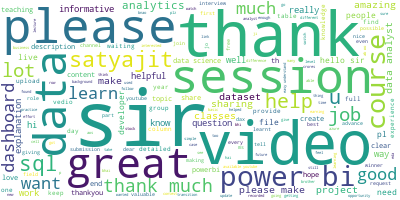

In [124]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color='white', max_words=5000, contour_width=5, contour_color='steelblue')
wordcloud.generate(' '.join(comments_df['Comment']))
wordcloud.to_image() 